In [1]:
#basic imports
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
import warnings
from collections import Counter

warnings.filterwarnings("ignore")

# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
%matplotlib inline
from sklearn.metrics import precision_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

# Pre-Processing

from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor


# Metrics
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
%matplotlib inline

In [2]:
import matplotlib

In [3]:
import tsfresh

In [4]:
#import pyeeg

In [5]:
#Load the Data
df = pd.read_csv("data/Seizure_data.csv")
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [81]:
df[df['Unnamed'] == 'X21.V1.724']

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11,X21.V1.724,-167,-230,-280,-315,-338,-369,-405,-392,-298,-140,27,146,211,223,214,187,167,166,179,192,190,168,129,85,43,4,-28,-47,-43,-24,-7,12,32,43,12,-70,-181,-292,-374,-410,-382,-335,-232,-128,-6,106,233,312,423,550,695,816,839,769,661,525,383,292,267,339,451,537,564,534,444,305,160,27,-74,-147,-205,-242,-274,-304,-331,-355,-372,-380,-370,-341,-299,-257,-235,-249,-300,-381,-399,-345,-183,17,178,274,288,265,229,193,160,106,34,-51,-120,-166,-189,-207,-225,-242,-251,-255,-237,-202,-120,19,186,340,441,465,410,288,130,-16,-123,-194,-232,-255,-272,-266,-255,-209,-168,-142,-148,-169,-180,-174,-107,12,206,419,596,683,679,596,472,330,168,26,-63,-73,-37,25,61,67,53,28,-6,-44,-92,-154,-211,-257,-258,-168,-32,140,277,366,408,416,415,423,434,416,374,319,268,215,165,103,1


## Exploratory Data Analysis

In [6]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [7]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [9]:
df.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [10]:
df['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

In [11]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1:]


In [12]:
y

,y
0,4
1,1
2,5
3,5
4,5
...,...
11495,2
11496,1
11497,5
11498,3


In [13]:
#make a data frame for the epileptic waves and the non epileptic waves
import matplotlib.pyplot as plt

df_pos = df[df["y"] == 1]
df_pos = df_pos.drop(columns = ["y"])
df_neg = df[df["y"] > 1]
df_neg = df_neg.drop(columns = ["y"])



In [14]:
print(len(df_pos))

2300


In [15]:
print(len(df_neg))

9200


In [16]:
df_pos.head(10)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,168,164,150,146,152,157,156,154,143,129
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-386,-400,-379,-336,-281,-226,-174,-125,-79,-40
11,X21.V1.724,-167,-230,-280,-315,-338,-369,-405,-392,-298,...,415,423,434,416,374,319,268,215,165,103
20,X23.V1.964,410,451,491,541,581,641,736,757,692,...,409,415,428,463,510,562,607,667,748,763
22,X11.V1.134,-264,-189,-117,-45,20,70,111,143,161,...,-227,-231,-221,-248,-321,-444,-530,-548,-536,-486
23,X18.V1.544,-4,40,78,123,149,185,197,189,167,...,-162,-189,-214,-226,-224,-203,-171,-129,-85,-40
24,X19.V1.294,593,328,88,-106,-456,-732,-921,-782,-522,...,271,312,360,421,445,413,310,177,41,-71
27,X3.V1.744,-340,-381,-376,-336,-275,-204,-131,-70,-16,...,234,114,-39,-185,-293,-351,-379,-380,-350,-308
30,X20.V1.374,-31,-10,5,9,9,2,-13,-42,-77,...,-18,-8,13,39,45,45,45,38,35,15
42,X18.V1.916,512,351,-90,-534,-944,-1002,-795,-292,286,...,-1293,-747,16,422,622,610,371,-99,-652,-1089


In [17]:
df_neg.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-6,-12,-31,-42,-54,-60,-64,-60,-56,-55


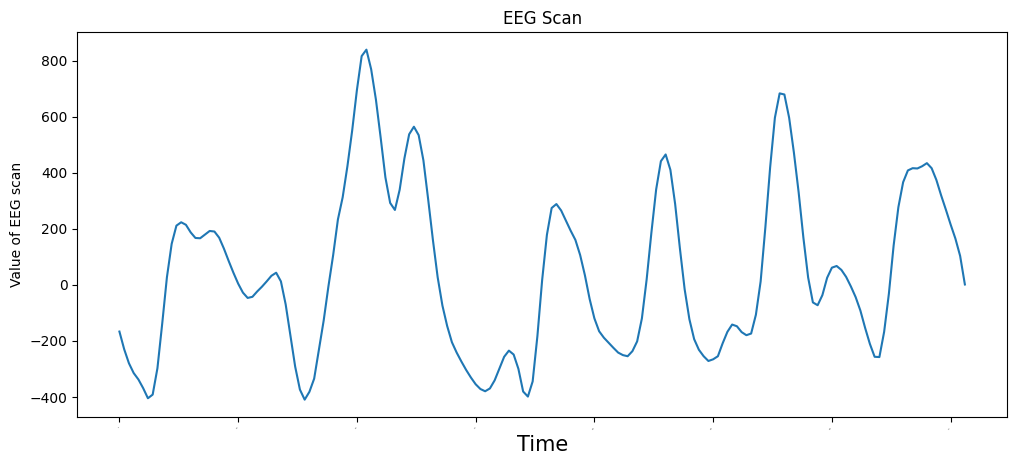

In [116]:
pred_data = pd.read_csv('data/seizure_example.csv')

#Plot this data     
original_data = pd.read_csv('data/Seizure_data.csv')
row_to_plot = original_data[original_data['Unnamed'] == pred_data['Unnamed'][0]]

fig, ax = plt.subplots(figsize=(12, 5))
plt.xticks(rotation=45, ha='right', fontsize = 0)
# Plot the row data
plt.plot(row_to_plot.T.values[1:])
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Value of EEG scan')
plt.title('EEG Scan')
plt.show()

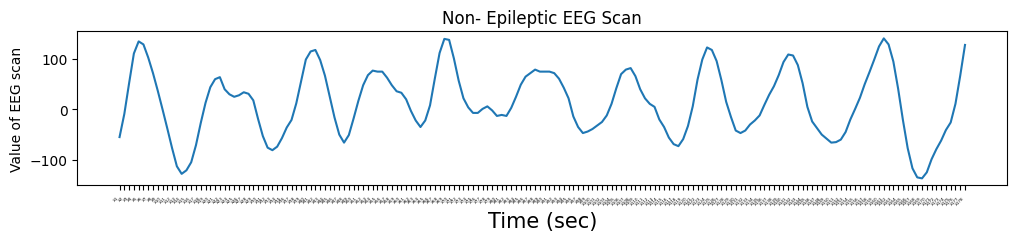

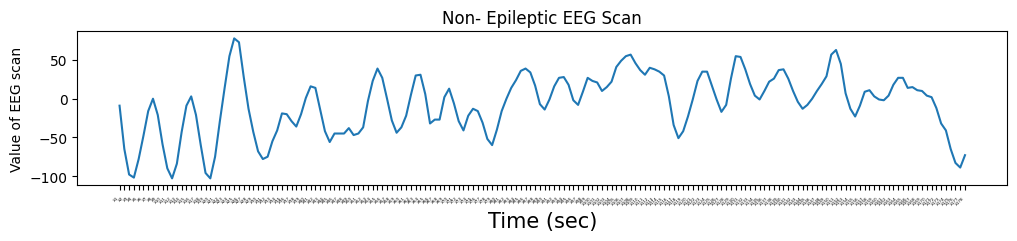

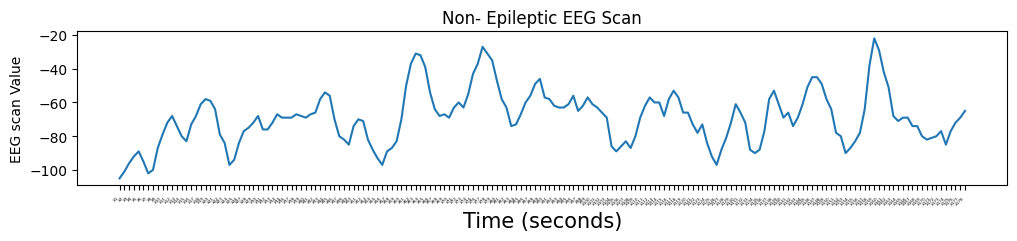

<Figure size 640x480 with 0 Axes>

In [18]:
row_index = 5  # Index of the row you want to plot
row_to_plot = df_neg.iloc[row_index]
plt.subplots(figsize=(12, 2))
plt.xticks(rotation=45, ha='right', fontsize = 3)
# Plot the row data
plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Time (sec)', fontsize = 15)
plt.ylabel('Value of EEG scan')
plt.title('Non- Epileptic EEG Scan')
plt.show()

row_index = 3  # Index of the row you want to plot
row_to_plot = df_neg.iloc[row_index]
plt.subplots(figsize=(12, 2))
plt.xticks(rotation=45, ha='right', fontsize = 3)
# Plot the row data
plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Time (sec)', fontsize = 15) #Remove (Sec) not in seconds 
plt.ylabel('Value of EEG scan')
plt.title('Non- Epileptic EEG Scan')
plt.show()

row_index = 2  # Index of the row you want to plot
row_to_plot = df_neg.iloc[row_index]
plt.subplots(figsize=(12, 2))
plt.xticks(rotation=45, ha='right', fontsize = 3)
# Plot the row data

plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Time (seconds)', fontsize = 15)
plt.ylabel('EEG scan Value')
plt.title('Non- Epileptic EEG Scan')
plt.show()
plt.savefig('no_epi_Scan.png', dpi=300)

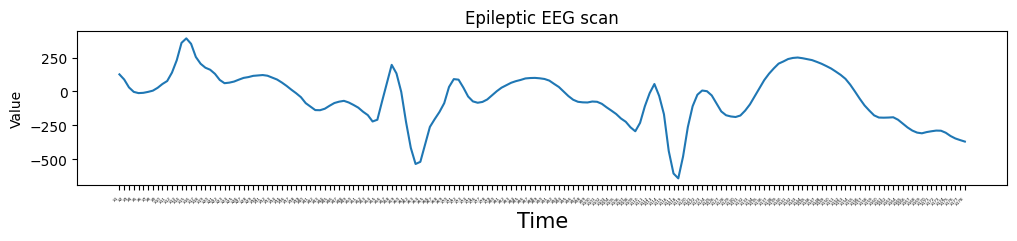

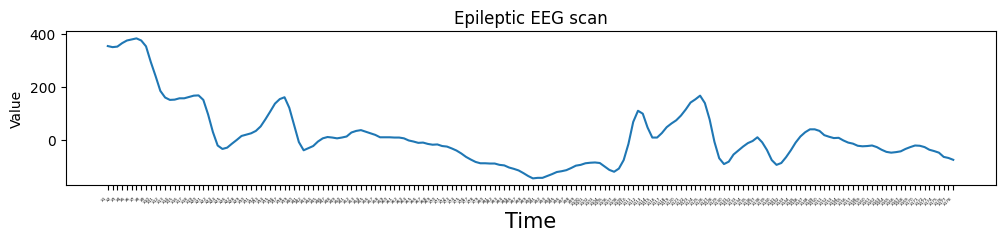

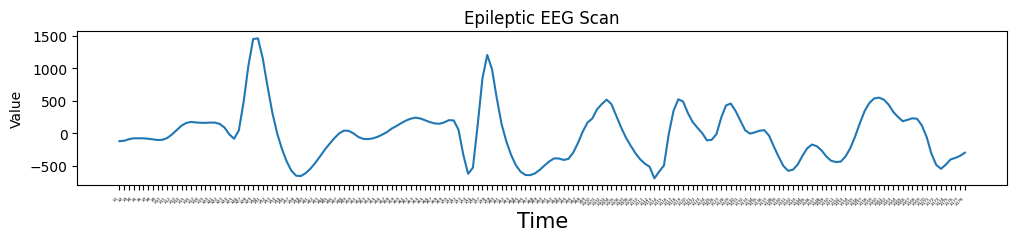

In [19]:
row_index = 28  # Index of the row you want to plot
row_to_plot = df_pos.iloc[row_index]
plt.subplots(figsize=(12, 2))
plt.xticks(rotation=45, ha='right', fontsize = 3)
# Plot the row data
plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Value')
plt.title('Epileptic EEG scan')
plt.show()

row_index = 30  # Index of the row you want to plot
row_to_plot = df_pos.iloc[row_index]
plt.subplots(figsize=(12, 2))
plt.xticks(rotation=45, ha='right', fontsize = 3)
# Plot the row data
plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Value')
plt.title('Epileptic EEG scan')
plt.show()


row_index = 22  # Index of the row you want to plot
row_to_plot = df_pos.iloc[row_index]
plt.subplots(figsize=(12, 2))
plt.xticks(rotation=45, ha='right', fontsize = 3)
# Plot the row data
plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Value')
plt.title('Epileptic EEG Scan')
plt.show()


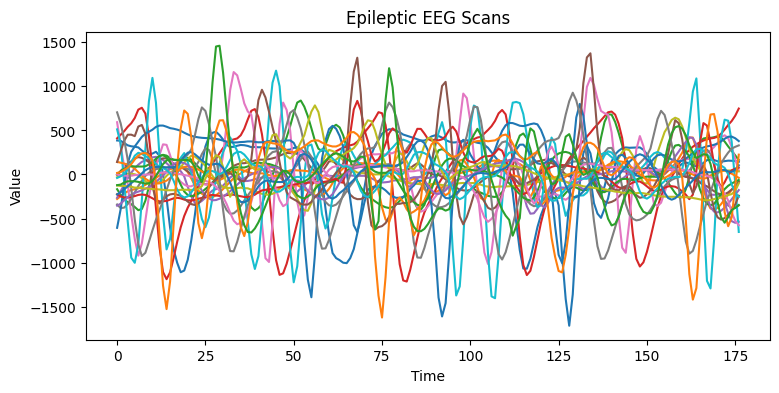

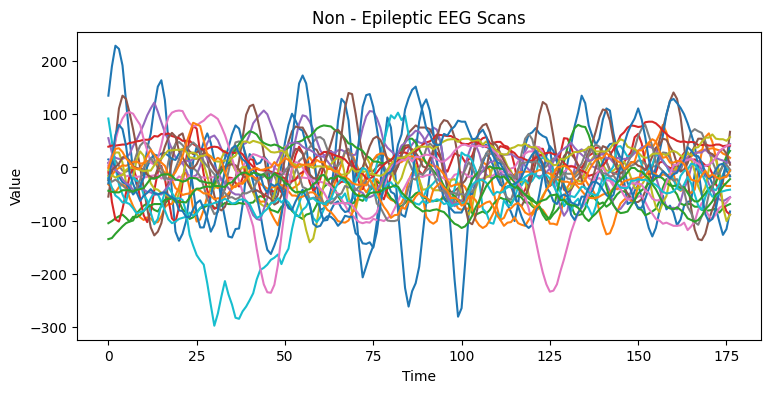

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(30,4))
plt.subplot(131)
[plt.plot(df_pos.values[i][1:-1]) for i in range(23)];
plt.xlabel('Time', fontsize = 10)
plt.ylabel('Value')
plt.title('Epileptic EEG Scans')
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(131)
[plt.plot(df_neg.values[i][1:-1]) for i in range(23)];
plt.xlabel('Time', fontsize = 10)
plt.ylabel('Value')
plt.title('Non - Epileptic EEG Scans')
plt.show()
plt.savefig('epilepticvsnoepiscanaverage_2.png', dpi=300)

In [21]:
trying_something = pd.read_csv('data/seizure_example.csv')
trying_something['Unnamed']

trying_something_22 = pd.read_csv('data/extracted_features.csv')
trying_something_22[trying_something_22['Unnamed: 0'] == trying_something['Unnamed'][0]]

,Unnamed: 0,"Value__fft_coefficient__attr_""abs""__coeff_57","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4",...,Value__index_mass_quantile__q_0.3,"Value__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.6",Value__autocorrelation__lag_1,Value__partial_autocorrelation__lag_1,Value__index_mass_quantile__q_0.2,"Value__fft_coefficient__attr_""real""__coeff_37",Value__symmetry_looking__r_0.15000000000000002,"Value__fft_coefficient__attr_""angle""__coeff_75","Value__fft_coefficient__attr_""angle""__coeff_67",Value__first_location_of_maximum
6850,X21.V1.724,166.267383,2868.173554,71.090909,7919.607897,2108.88,48.4,4346.5824,8110.312175,2936.219194,...,0.308989,-1.575758,0.967436,0.967436,0.275281,-152.985678,1,166.324291,166.476528,0.292135


In [22]:
dfb = df.copy()
y= dfb[['Unnamed','y']]
X = dfb.drop(columns = ['y'])

# Remove X from column names to more easily sort by numbered order
X.columns = X.columns.str.replace('X', '')
# Add new column of binary classificaiton of seizure
y['binary_y'] = np.where(y['y'] == 1, 1, 0)
y_ = y[['Unnamed','binary_y']]

X_ = X.melt(id_vars= 'Unnamed', 
        var_name="Time", 
        value_name="Value")

X_['Time'] = pd.to_numeric(X_['Time']) #
X_.sort_values(['Unnamed','Time'], inplace=True)
y_.sort_values(['Unnamed'], inplace=True)
y_ = y_.set_index('Unnamed')

y_ = y_.reset_index()


In [23]:
df_melt = pd.merge(X_, y_, how='right')
df_melt


,Unnamed,Time,Value,binary_y
0,X1.V1,1,12,0
1,X1.V1,2,22,0
2,X1.V1,3,35,0
3,X1.V1,4,45,0
4,X1.V1,5,69,0
...,...,...,...,...
2046995,X9.V14,174,42,1
2046996,X9.V14,175,394,1
2046997,X9.V14,176,580,1
2046998,X9.V14,177,562,1


In [24]:
y_

,Unnamed,binary_y
0,X1.V1,0
1,X1.V1.1,0
2,X1.V1.10,0
3,X1.V1.101,0
4,X1.V1.102,0
...,...,...
11495,X9.V1.994,1
11496,X9.V11,0
11497,X9.V12,0
11498,X9.V13,0


In [25]:
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_relevant_features

In [26]:
from tsfresh.feature_extraction import ComprehensiveFCParameters
settings = ComprehensiveFCParameters()
# Set here the options of the settings object as shown in the paragraphs below
# ...
from tsfresh.feature_extraction import extract_features

In [27]:
y_

,Unnamed,binary_y
0,X1.V1,0
1,X1.V1.1,0
2,X1.V1.10,0
3,X1.V1.101,0
4,X1.V1.102,0
...,...,...
11495,X9.V1.994,1
11496,X9.V11,0
11497,X9.V12,0
11498,X9.V13,0


In [28]:
#df_X_features = extract_relevant_features(df_melt, y_['binary_y'], column_id = "Unnamed", column_sort='Time', column_value="Value", default_fc_parameters=settings)

In [29]:
df_X_features = pd.read_csv('Data/extracted_features.csv')
#df_X_features.to_csv('Data/extracted_features.csv')

# Setup X and y dateframes to begin modelling
X_for_modeling = df_X_features.copy()
y_for_modeling = y_['binary_y']

# Now you can start you Model classification using the X and Y from above

y_for_modeling

0        0
1        0
2        0
3        0
4        0
        ..
11495    1
11496    0
11497    0
11498    0
11499    1
Name: binary_y, Length: 11500, dtype: int64

In [30]:
y_

,Unnamed,binary_y
0,X1.V1,0
1,X1.V1.1,0
2,X1.V1.10,0
3,X1.V1.101,0
4,X1.V1.102,0
...,...,...
11495,X9.V1.994,1
11496,X9.V11,0
11497,X9.V12,0
11498,X9.V13,0


In [31]:
X_for_modeling.columns


Index(['Unnamed: 0', 'Value__fft_coefficient__attr_"abs"__coeff_57',
       'Value__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.6',
       'Value__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.6',
       'Value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.6',
       'Value__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.6',
       'Value__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.6',
       'Value__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.6',
       'Value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.8',
       'Value__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.4',
       ...
       'Value__index_mass_quantile__q_0.3',
       'Value__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.6',
       'Value__autocorrelation__lag_1',
       'Value__partial_autocorrelation__lag_1',
       'Value__index_mass_quantile__q_0.2',
       'Value__fft_coefficient__attr_"real"__coeff_37',
      

In [32]:
import seaborn as sns
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

## First Logistic Regression Model 

In [33]:
#imports for Logistic Regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [34]:
#train split the data
X = X_for_modeling.drop(columns = ["Unnamed: 0"])
y = y_for_modeling


X

,"Value__fft_coefficient__attr_""abs""__coeff_57","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4",...,Value__index_mass_quantile__q_0.3,"Value__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.6",Value__autocorrelation__lag_1,Value__partial_autocorrelation__lag_1,Value__index_mass_quantile__q_0.2,"Value__fft_coefficient__attr_""real""__coeff_37",Value__symmetry_looking__r_0.15000000000000002,"Value__fft_coefficient__attr_""angle""__coeff_75","Value__fft_coefficient__attr_""angle""__coeff_67",Value__first_location_of_maximum
0,51.007234,31.764922,7.151515,82.908173,18.198400,4.960000,42.025600,81.433594,36.649730,95.252729,...,0.264045,0.030303,0.931450,0.931450,0.168539,-50.226949,1,0.304850,40.090555,0.033708
1,34.101047,130.020031,13.564516,313.170916,36.620499,9.894737,127.036011,227.759810,114.689553,267.984483,...,0.168539,0.919355,0.936497,0.936497,0.123596,-42.419438,1,-90.993816,46.038087,0.713483
2,49.015052,47.664399,8.714286,123.391282,19.700000,6.000000,54.490000,122.763377,53.490638,146.832075,...,0.365169,0.460317,0.970434,0.970434,0.264045,21.754051,1,169.609464,179.245103,0.252809
3,195.903449,541.369722,28.383333,1339.960833,91.200617,15.277778,323.496914,1180.743484,598.716037,1579.549371,...,0.258427,2.650000,0.906939,0.906939,0.191011,-9.786756,1,157.488121,146.042618,0.314607
4,13.422923,5.546485,3.238095,15.773747,2.355372,2.090909,6.429752,16.860969,5.870405,14.936183,...,0.157303,-0.507937,0.905405,0.905405,0.117978,54.038435,1,-42.996532,-172.186013,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,299.343498,1472.605917,51.384615,4098.191716,1164.737240,49.043478,2920.858223,1996.112222,2266.409600,6143.945600,...,0.353933,-3.846154,0.966713,0.966713,0.230337,117.295530,1,20.425142,-61.865002,0.359551
11496,54.302423,56.764828,11.096774,178.700312,64.338843,11.545455,195.776860,110.938889,86.105900,235.167500,...,0.264045,1.096774,0.946817,0.946817,0.207865,-49.948844,1,-128.386673,158.315126,0.544944
11497,36.967458,26.227755,6.171429,64.314286,6.800000,3.000000,15.728889,94.902344,26.124183,66.225682,...,0.247191,0.000000,0.982084,0.982084,0.162921,59.336896,1,10.515178,38.680461,0.617978
11498,40.532085,9.818115,3.796875,23.695068,7.155325,3.192308,17.332840,18.420898,9.365748,22.036663,...,0.213483,-0.734375,0.961505,0.961505,0.117978,47.873480,1,26.931311,-64.349919,0.011236


In [35]:

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = .3, 
                                                    random_state =42)



#X.rename(columns={"Unnamed: 0": 'Segment'}, inplace=True)

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
print(y_hat_train)
print(y_hat_test)

[1 1 0 ... 0 1 1]
[0 1 0 ... 0 0 0]


In [36]:


accuracy_score(y_test, model.predict(X_test))

0.9582608695652174

In [37]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2763
           1       0.94      0.84      0.89       687

    accuracy                           0.96      3450
   macro avg       0.95      0.91      0.93      3450
weighted avg       0.96      0.96      0.96      3450



In [38]:
df3 = tsfresh.feature_selection.relevance.calculate_relevance_table(X, y, ml_task='auto')
df3.head(100)

,feature,type,p_value,relevant
feature,,,,
"Value__fft_coefficient__attr_""abs""__coeff_57","Value__fft_coefficient__attr_""abs""__coeff_57",real,0.0,True
"Value__fft_coefficient__attr_""abs""__coeff_86","Value__fft_coefficient__attr_""abs""__coeff_86",real,0.0,True
"Value__fft_coefficient__attr_""abs""__coeff_85","Value__fft_coefficient__attr_""abs""__coeff_85",real,0.0,True
"Value__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""max""","Value__agg_linear_trend__attr_""intercept""__chu...",real,0.0,True
"Value__fft_coefficient__attr_""abs""__coeff_10","Value__fft_coefficient__attr_""abs""__coeff_10",real,0.0,True
...,...,...,...,...
Value__standard_deviation,Value__standard_deviation,real,0.0,True
Value__variance,Value__variance,real,0.0,True
Value__root_mean_square,Value__root_mean_square,real,0.0,True


In [39]:

pd.set_option('display.max_columns', None)
X_for_modeling.head()

,Unnamed: 0,"Value__fft_coefficient__attr_""abs""__coeff_57","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4","Value__fft_coefficient__attr_""abs""__coeff_30","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.8","Value__fft_coefficient__attr_""abs""__coeff_29","Value__fft_coefficient__attr_""abs""__coeff_15","Value__fft_coefficient__attr_""abs""__coeff_16","Value__fft_coefficient__attr_""abs""__coeff_17","Value__fft_coefficient__attr_""abs""__coeff_18","Value__fft_coefficient__attr_""abs""__coeff_19","Value__fft_coefficient__attr_""abs""__coeff_20","Value__fft_coefficient__attr_""abs""__coeff_21","Value__fft_coefficient__attr_""abs""__coeff_22","Value__fft_coefficient__attr_""abs""__coeff_23","Value__fft_coefficient__attr_""abs""__coeff_24","Value__fft_coefficient__attr_""abs""__coeff_25","Value__fft_coefficient__attr_""abs""__coeff_26","Value__fft_coefficient__attr_""abs""__coeff_27","Value__fft_coefficient__attr_""abs""__coeff_56","Value__fft_coefficient__attr_""abs""__coeff_28","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","Value__fft_coefficient__attr_""abs""__coeff_14","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.0","Value__fft_coefficient__attr_""abs""__coeff_31","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.2__ql_0.0",Value__ar_coefficient__coeff_9__k_10,Value__ar_coefficient__coeff_8__k_10,Value__ar_coefficient__coeff_6__k_10,Value__ar_coefficient__coeff_4__k_10,Value__ar_coefficient__coeff_2__k_10,Value__ar_coefficient__coeff_1__k_10,"Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2"

In [40]:
df2 = pd.concat([df_X_features, y_], axis=1, join="inner")
df2

,Unnamed: 0,"Value__fft_coefficient__attr_""abs""__coeff_57","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4","Value__fft_coefficient__attr_""abs""__coeff_30","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.8","Value__fft_coefficient__attr_""abs""__coeff_29","Value__fft_coefficient__attr_""abs""__coeff_15","Value__fft_coefficient__attr_""abs""__coeff_16","Value__fft_coefficient__attr_""abs""__coeff_17","Value__fft_coefficient__attr_""abs""__coeff_18","Value__fft_coefficient__attr_""abs""__coeff_19","Value__fft_coefficient__attr_""abs""__coeff_20","Value__fft_coefficient__attr_""abs""__coeff_21","Value__fft_coefficient__attr_""abs""__coeff_22","Value__fft_coefficient__attr_""abs""__coeff_23","Value__fft_coefficient__attr_""abs""__coeff_24","Value__fft_coefficient__attr_""abs""__coeff_25","Value__fft_coefficient__attr_""abs""__coeff_26","Value__fft_coefficient__attr_""abs""__coeff_27","Value__fft_coefficient__attr_""abs""__coeff_56","Value__fft_coefficient__attr_""abs""__coeff_28","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","Value__fft_coefficient__attr_""abs""__coeff_14","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.0","Value__fft_coefficient__attr_""abs""__coeff_31","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.2__ql_0.0",Value__ar_coefficient__coeff_9__k_10,Value__ar_coefficient__coeff_8__k_10,Value__ar_coefficient__coeff_6__k_10,Value__ar_coefficient__coeff_4__k_10,Value__ar_coefficient__coeff_2__k_10,Value__ar_coefficient__coeff_1__k_10,"Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2"

In [41]:
#df2 = df2.reset_index()

In [42]:
#df2 = df2.drop(columns = ["level_0"])
df2.drop(columns = ['Unnamed: 0', "Unnamed"], inplace = True)


In [43]:
#df2 = df2.drop(columns = ['Unnamed: 0', "Unnamed"], inplace = True)



In [44]:
df2

,"Value__fft_coefficient__attr_""abs""__coeff_57","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4","Value__fft_coefficient__attr_""abs""__coeff_30","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.8","Value__fft_coefficient__attr_""abs""__coeff_29","Value__fft_coefficient__attr_""abs""__coeff_15","Value__fft_coefficient__attr_""abs""__coeff_16","Value__fft_coefficient__attr_""abs""__coeff_17","Value__fft_coefficient__attr_""abs""__coeff_18","Value__fft_coefficient__attr_""abs""__coeff_19","Value__fft_coefficient__attr_""abs""__coeff_20","Value__fft_coefficient__attr_""abs""__coeff_21","Value__fft_coefficient__attr_""abs""__coeff_22","Value__fft_coefficient__attr_""abs""__coeff_23","Value__fft_coefficient__attr_""abs""__coeff_24","Value__fft_coefficient__attr_""abs""__coeff_25","Value__fft_coefficient__attr_""abs""__coeff_26","Value__fft_coefficient__attr_""abs""__coeff_27","Value__fft_coefficient__attr_""abs""__coeff_56","Value__fft_coefficient__attr_""abs""__coeff_28","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","Value__fft_coefficient__attr_""abs""__coeff_14","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.0","Value__fft_coefficient__attr_""abs""__coeff_31","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.2__ql_0.0",Value__ar_coefficient__coeff_9__k_10,Value__ar_coefficient__coeff_8__k_10,Value__ar_coefficient__coeff_6__k_10,Value__ar_coefficient__coeff_4__k_10,Value__ar_coefficient__coeff_2__k_10,Value__ar_coefficient__coeff_1__k_10,"Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2","Value__ch

In [45]:
df2.to_csv('Data/extracted_file1.csv')

## EDA of PCA data

In [46]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)



In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(solver='liblinear')

In [48]:
def get_variance(X, n):
    scaler = StandardScaler()
    pca = PCA(n_components=n)

    pca.fit(scaler.fit_transform(X))

    return pca.explained_variance_ratio_.cumsum()[-1:]

In [49]:
for i in range(1,14):
    print('Components:\t', i, '=\t', get_variance(X, i), 
          '\tCumulative Variance')

Components:	 1 =	 [0.33575733] 	Cumulative Variance
Components:	 2 =	 [0.3986254] 	Cumulative Variance
Components:	 3 =	 [0.44244011] 	Cumulative Variance


KeyboardInterrupt: 

In [ ]:
def transform_pca(X, n):

    pca = PCA(n_components=n)
    pca.fit(X)
    X_new = pca.inverse_transform(pca.transform(X))

    return X_new



In [ ]:
rows = 4
cols = 3
comps = 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

fig, axes = plt.subplots(rows, 
                         cols, 
                         figsize=(12,12), 
                         sharex=True, 
                         sharey=True)


for row in range(rows):
    for col in range(cols):
        try:
            X_new = transform_pca(X_scaled, comps)
            ax = sns.scatterplot(x=X_scaled[:, 0], 
                                 y=X_scaled[:, 1], 
                                 ax=axes[row, col], 
                                 color='green', 
                                 alpha=.3)
            ax = sns.scatterplot(x=X_new[:, 0], 
                                 y=X_new[:, 1], 
                                 ax=axes[row, col], 
                                 color='blue')
            ax.set_title(f'PCA Components: {comps}');

            comps += 1
        except:
            pass
plt.tight_layout()
plt.savefig('pcavisual.png', dpi=300)

In [ ]:
from sklearn.pipeline import FeatureUnion
def create_pipe(clf, do_pca=False, n=2):

    scaler = StandardScaler()
    pca = PCA()

    if do_pca == True:
        combined_features = FeatureUnion([("scaler", scaler), 
                                          ("pca", pca)])
    else:
        combined_features = FeatureUnion([("scaler", scaler)])

    pipeline = Pipeline([("features", combined_features), 
                         ("clf", clf)])


    return pipeline

In [ ]:
models = {'KNeighbors' : KNeighborsClassifier(),
          'RandomForest' : RandomForestClassifier(random_state=42),
          'LogisticReg' : LogisticRegression(random_state=42),
          'Xgb': XGBClassifier()}
          


def run_models(with_pca):
    for name, model, in models.items():
        clf = model
        pipeline = create_pipe(clf, do_pca = with_pca)
        scores = cross_val_score(pipeline, X_train, 
                                 y_train, 
                                 scoring='accuracy', 
                                 cv=3, n_jobs=1, 
                                 error_score='raise')
        print(name, ': Mean Accuracy: %.3f and Standard Deviation:(%.3f)' % (np.mean(scores), np.std(scores)))

print(68 * '-')
print('Without PCA')
print(68 * '-')
run_models(False)
print(68 * '-')
print('With PCA')
print(68 * '-')
run_models(True)
print(68 * '-')

In [ ]:
from sklearn.pipeline import FeatureUnion
def create_pipe_umap(clf, do_umap=False, n=2):

    scaler = StandardScaler()
    umap_model = umap.UMAP(n_components=2)

    if do_umap == True:
        combined_features = FeatureUnion([("scaler", scaler), 
                                          ("umap", umap)])
    else:
        combined_features = FeatureUnion([("scaler", scaler)])

    pipeline = Pipeline([("features", combined_features), 
                         ("clf", clf)])


    return pipeline

In [ ]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models_3 = {'KNeighbors': KNeighborsClassifier(),
            'RandomForest': RandomForestClassifier(random_state=42),
            'LogisticReg': LogisticRegression(random_state=42), 
            'Xgb': XGBClassifier()}

class UMAPTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.umap_model = umap.UMAP(n_components=self.n_components)

    def fit(self, X, y=None):
        self.umap_model.fit(X)
        return self

    def transform(self, X):
        return self.umap_model.transform(X)

def create_pipe_umap(clf, do_umap=False, n=2):
    scaler = StandardScaler()

    if do_umap:
        combined_features = FeatureUnion([("scaler", scaler), ("umap", UMAPTransformer(n_components=n))])
    else:
        combined_features = FeatureUnion([("scaler", scaler)])

    pipeline = Pipeline([("features", combined_features), ("clf", clf)])
    return pipeline

def run_models(with_umap):
    for name, model in models_3.items():
        clf = model
        pipeline = create_pipe_umap(clf, do_umap=with_umap)
        scores = cross_val_score(pipeline, X_train, y_train,
                                 scoring='accuracy', cv=3, n_jobs=1,
                                 error_score='raise')
        print(name, ': Mean Accuracy: %.3f and Standard Deviation: (%.3f)' % (np.mean(scores), np.std(scores)))

print(68 * '-')
print('Without UMAP')
print(68 * '-')
run_models(False)
print(68 * '-')
print('With UMAP')
print(68 * '-')
run_models(True)
print(68 * '-')


In [ ]:
import umap.plot
mapper = umap.UMAP().fit(X_train, y_train)

umap.plot.points(mapper)

In [ ]:
umap.plot.points(mapper, labels = y_train)
plt.savefig('umapvisual.png', dpi=300)

In [ ]:
def fit_and_print(pipeline):

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(metrics.classification_report(y_test, y_pred, digits=3))

    ConfusionMatrixDisplay.from_predictions(y_test, 
                                            y_pred, 
                                            cmap=plt.cm.Greys)

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show; 


In [ ]:
clf = LogisticRegression(C=10, 
                         penalty='l1', 
                         solver='liblinear', 
                         random_state=41)
pipeline = create_pipe(clf, do_pca=True, n=2)
fit_and_print(pipeline)

In [ ]:
clf = LogisticRegression(C=10, 
                         penalty='l1', 
                         solver='liblinear', 
                         random_state=41)
pipeline = create_pipe(clf, do_pca=False)
fit_and_print(pipeline)

In [ ]:
var = pca.explained_variance_[0:8] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']

plt.figure(figsize=(15,7))
plt.bar(labels,var,)
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of PCA Components Variance')

plt.savefig('PCA_variance', dpi=300)


In [ ]:

import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color = df2['binary_y'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
    
)
fig.show()

In [ ]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

# Custom colors for the dots based on binary class labels
# You can choose any color you prefer for each class
colors = ['blue' if label == 0 else 'red' for label in df2['binary_y']]

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=colors,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_std)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


features = ["Epileptic Seizure", "Non-Epileptic Seizure"]

# Scale the data (important step before applying PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
components = pca.fit_transform(X_train_scaled)


loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1)


for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have already defined X_train, features, and feature_labels
# ...

# Scale the data (important step before applying PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
components = pca.fit_transform(X_train_scaled)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame to combine the components and feature_labels
import pandas as pd
df = pd.DataFrame(components, columns=['Principal Component 1', 'Principal Component 2'])
df['Feature'] = df2["binary_y"]  # Replace 'feature_labels' with your actual column containing feature labels

# Create the scatter plot using Plotly Express and set the 'color' parameter
fig = px.scatter(df, x='Principal Component 1', y='Principal Component 2', color='Feature')

# Annotate the plot with arrows indicating feature contributions
for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        bgcolor = 'white',
        yshift=5,
    )

# Display the plot
fig.show()

### Plotly Express and PCA to visualize the principal components and their corresponding loadings for a given dataset

## Creating a pipeline for first logistic model with standard scaler , PCA 

In [ ]:
#X = df2.drop(columns = ["binary_y"])
#y = df2["binary_y"]

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    random_state =42)
ext_cols = X_train.select_dtypes('float').columns





In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from tsfresh.transformers import RelevantFeatureAugmenter
from tsfresh.feature_extraction import extract_features
from sklearn.compose import ColumnTransformer

extract_pipeline = Pipeline([
                    ('extract', RelevantFeatureAugmenter(column_id='Segment', column_sort='Time', column_value= "Value"))])


ct = ColumnTransformer([ 
     ("extpipe", extract_pipeline, ext_cols)])

pipe1 = Pipeline([
        ('preprocess', ct),
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=0.95)),
        ('Log', LogisticRegression(random_state = 42))])


In [ ]:
#grid = [{'extract__column_id': "Segment", 
         #'extract__column_sort': "Time", 
         #'extract__column_value': "Value"}]

In [ ]:
extract_pipeline.set_params(extract__timeseries_container= df_melt)
pipe1.fit(X_train, y_train)


In [ ]:
X_.rename(columns={"Unnamed": 'Segment'}, inplace=True)


In [ ]:
pipe1.fit(X_train, y_train)

In [ ]:
pipe1.score(X_train, y_train)

## Logistic Regression Model + PCA + SS

In [50]:
pipe2 = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=0.95)),
        ('Log', LogisticRegression(random_state = 42))])

In [51]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('Log', LogisticRegression(random_state=42))])

In [52]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('Log', LogisticRegression(random_state=42))])

In [79]:
import pickle

filename = "pca_logreg_model.pickle"

# save model
pickle.dump(pipe2, open(filename, "wb"))

# # load model
# loaded_model = pickle.load(open("umap_logreg_model.pickle", "rb"))

In [53]:
pipe2.score(X_train, y_train)

0.9937888198757764

In [54]:
y_pr_trn_1 = pipe2.predict(X_train)
y_predicted_1 = pipe2.predict(X_test)

In [55]:
print(classification_report(y_test, y_predicted_1 ))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2763
           1       0.97      0.95      0.96       687

    accuracy                           0.98      3450
   macro avg       0.98      0.97      0.98      3450
weighted avg       0.98      0.98      0.98      3450



In [56]:
scores_2 = cross_val_score(pipe2, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores_2.mean())

<IPython.core.display.Javascript object>

Cross-Validation Accuracy Scores 0.9854658385093167


In [57]:
confusion_1 = confusion_matrix(y_predicted_1, y_test)

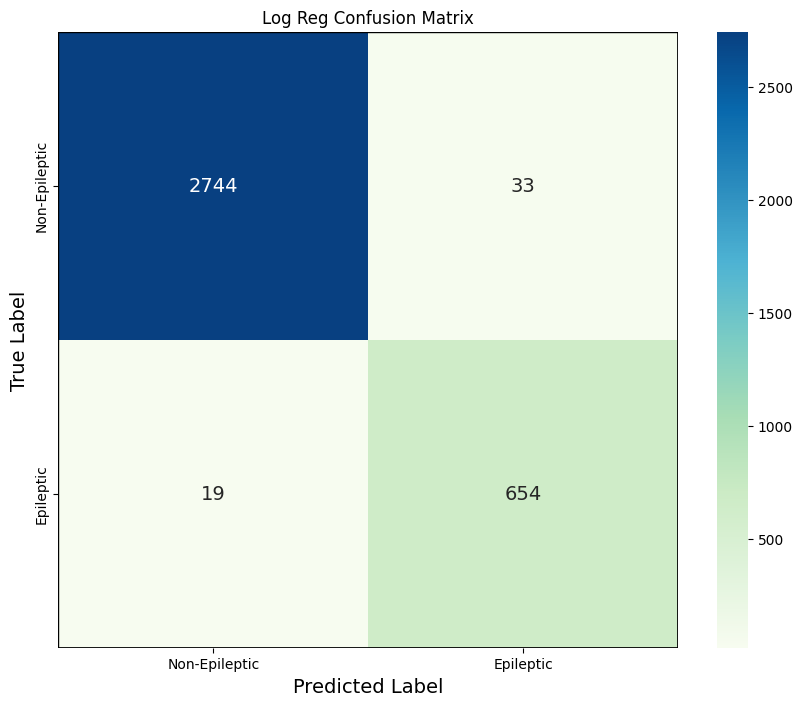

In [58]:
# plotting a confusion matrix

fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(confusion_1, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
             cmap ="GnBu", linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Log Reg Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = confusion_1.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = confusion_1.shape[0], 
            color = 'k', linewidth = 2)
ax.xaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']); ax.yaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']);
plt.show()

In [59]:
from sklearn.metrics import roc_curve, auc

In [60]:
fpr, tpr, thresholds = roc_curve(y_test,y_predicted_1 )

In [61]:
roc_auc_1 = auc(fpr, tpr)

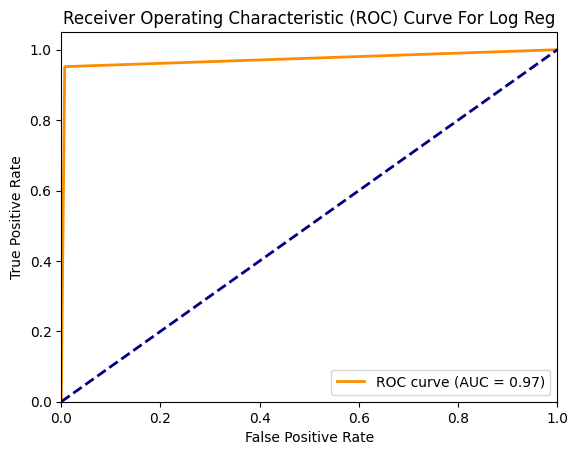

In [62]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For Log Reg')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression Model + SS + UMAP

In [63]:
import umap


pipe8 = Pipeline([
        ('scale', StandardScaler()),
        ('Log', LogisticRegression(random_state = 42))])


In [64]:
umap_model = umap.UMAP(n_components=2)
X_umap = umap_model.fit_transform(X_train, y_train)

In [65]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_umap, y_train, test_size=0.2, random_state=42)

In [75]:
logreg_model = LogisticRegression()

# Train the model on the training data

logreg_model.fit(X_train_1, y_train_1)

LogisticRegression()

In [78]:
X_train_1.shape

(6440, 2)

In [204]:
df2.shape

(11500, 368)

In [67]:
y_pred = logreg_model.predict(X_test_1)

In [68]:
accuracy = accuracy_score(y_test_1, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test_1, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test_1, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1277
           1       0.97      0.99      0.98       333

    accuracy                           0.99      1610
   macro avg       0.98      0.99      0.99      1610
weighted avg       0.99      0.99      0.99      1610

Confusion Matrix:
[[1265   12]
 [   2  331]]


In [69]:
scores_umap = cross_val_score(logreg_model, X_train_1, y_train_1, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores_umap.mean())

<IPython.core.display.Javascript object>

Cross-Validation Accuracy Scores 0.9906832298136645


In [70]:
confusion_2 = confusion_matrix(y_pred, y_test_1)

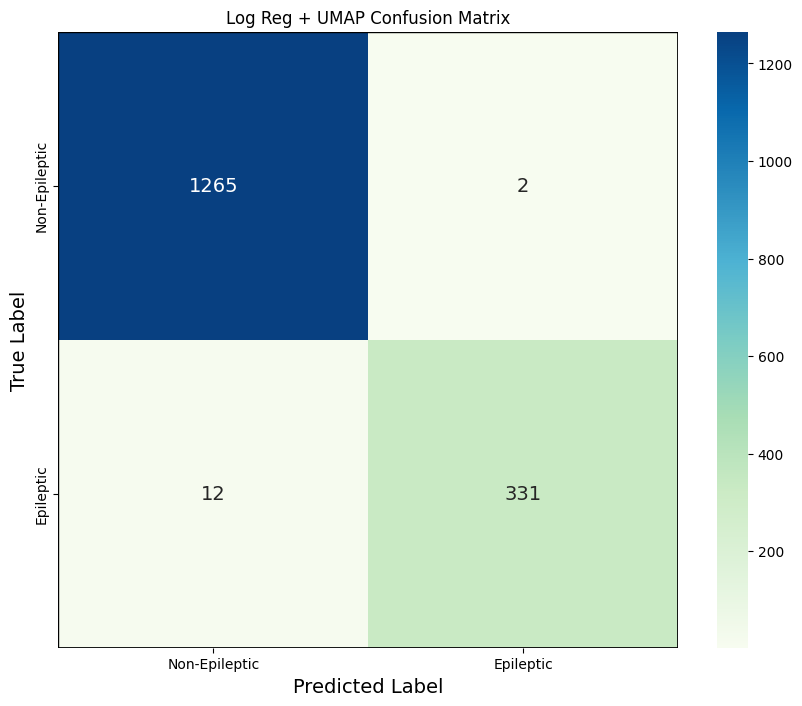

In [71]:
# plotting a confusion matrix

fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(confusion_2, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
             cmap ="GnBu", linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Log Reg + UMAP Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = confusion_2.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = confusion_2.shape[0], 
            color = 'k', linewidth = 2)
ax.xaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']); ax.yaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']);
plt.show()

In [117]:
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred)

In [118]:
roc_auc_2 = auc(fpr, tpr)

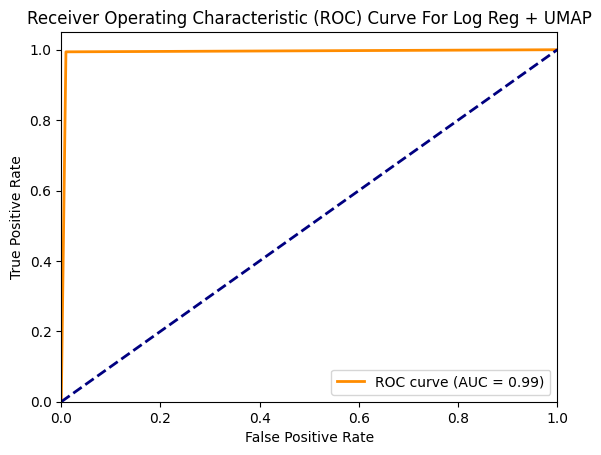

In [119]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For Log Reg + UMAP')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression + SS + PCA + SMOTE 

In [ ]:

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


pipe3 = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=0.95)),
        ('smote', SMOTE(random_state = 42)),
        ('Log', LogisticRegression(random_state = 42))])

In [ ]:
pipe3.fit(X_train, y_train)

In [ ]:
pipe3.score(X_train, y_train)

In [ ]:
y_pr_trn_2 = pipe3.predict(X_train)
y_pr_tst_2 = pipe3.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pr_tst_2))

In [ ]:
y_predicted_1 = pipe3.predict(X_test)
confusion_1 = confusion_matrix(y_predicted_1, y_test)

In [ ]:
# plotting a confusion matrix

fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(confusion_1, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
             cmap ="GnBu", linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Log Reg + SMOTE Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = confusion_1.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = confusion_1.shape[0], 
            color = 'k', linewidth = 2)
ax.xaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']); ax.yaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']);
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_1)
roc_auc_1 = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For Log Reg + SMOTE')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression + SS+ PCA + L2 regularization

In [120]:
pipe7 = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=0.95)),
        ('Log', LogisticRegression(penalty='l2', C=1.0))])

In [121]:
pipe7.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('Log', LogisticRegression())])

In [122]:
pipe7.score(X_train, y_train)

0.9937888198757764

In [123]:
y_pr_trn_7 = pipe7.predict(X_train)
y_pr_tst_7 = pipe7.predict(X_test)

In [124]:
print("train score is", pipe7.score(X_train,y_train))
print("test score is", pipe7.score(X_test,y_test))
print("train predicted score is", y_pr_trn_7)
print("test predicted score is", y_pr_tst_7)

train score is 0.9937888198757764
test score is 0.984927536231884
train predicted score is [1 1 0 ... 0 1 1]
test predicted score is [0 1 0 ... 0 0 0]


In [125]:
print(classification_report(y_test, y_pr_tst_7))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2763
           1       0.97      0.95      0.96       687

    accuracy                           0.98      3450
   macro avg       0.98      0.97      0.98      3450
weighted avg       0.98      0.98      0.98      3450



In [126]:
scores_7 = cross_val_score(pipe7, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores_7.mean())

<IPython.core.display.Javascript object>

Cross-Validation Accuracy Scores 0.9854658385093167


In [127]:
y_predicted_3 = pipe7.predict(X_test)



In [128]:
confusion_3 = confusion_matrix(y_predicted_3, y_test)

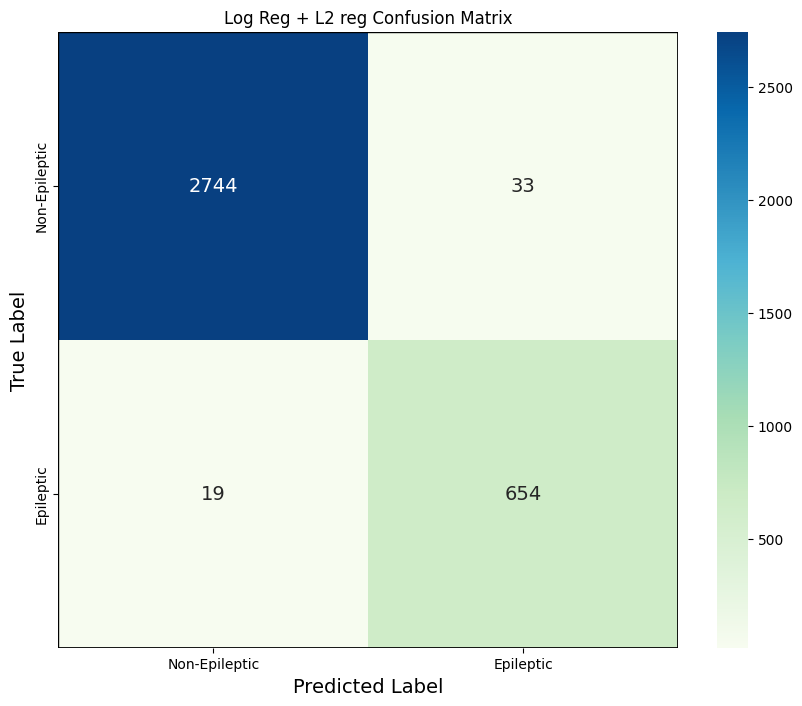

In [129]:
# plotting a confusion matrix

fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(confusion_3, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
             cmap ="GnBu", linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Log Reg + L2 reg Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = confusion_3.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = confusion_3.shape[0], 
            color = 'k', linewidth = 2)
ax.xaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']); ax.yaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']);
plt.show()

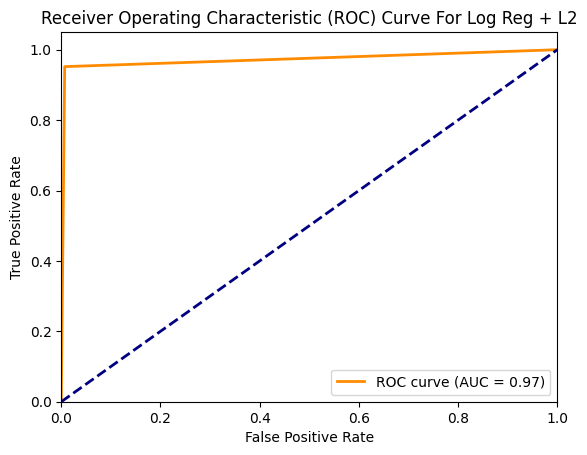

In [131]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_3)
roc_auc_3 = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For Log Reg + L2')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier + SS + PCA 

In [132]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

pipe4 = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=0.95)),
        ('dtc', DecisionTreeClassifier())])

In [133]:
pipe4.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('dtc', DecisionTreeClassifier())])

In [134]:
grid = [{'dtc__max_depth': [4, 5, 6, 10, 20, 25], 
         'dtc__min_samples_split': [2, 5, 10], 
         'dtc__min_samples_leaf': [1, 3, 5]}]

In [135]:
gridsearch = GridSearchCV(estimator= pipe4, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

In [136]:
gridsearch.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
gridsearch.score(X_test, y_test)

In [ ]:
gridsearch.best_params_

In [ ]:
print("train score is", pipe4.score(X_train,y_train))
print("test score is", pipe4.score(X_test,y_test))

In [ ]:
y_pr_trn_4 = pipe4.predict(X_train)
y_predicted_4 = pipe4.predict(X_test)

In [ ]:
confusion_4 = confusion_matrix(y_predicted_4, y_test)

In [ ]:
# plotting a confusion matrix

fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(confusion_4, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
             cmap ="GnBu", linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Decision Tree Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = confusion_4.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = confusion_4.shape[0], 
            color = 'k', linewidth = 2)
ax.xaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']); ax.yaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']);
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_4)
roc_auc_4 = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_4)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For Decision Tree')
plt.legend(loc="lower right")
plt.show()

## Linear SVM MODEL

In [ ]:
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_linear_svc) + '%')

## K-NN Model + SS

In [137]:
from sklearn.neighbors import KNeighborsClassifier
pipe5 = Pipeline([
                ('scale', StandardScaler()),
                ('knn', KNeighborsClassifier())])



In [138]:
pipe5.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

In [142]:
print(classification_report(y_test, y_predicted_5))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2763
           1       0.99      0.93      0.96       687

    accuracy                           0.98      3450
   macro avg       0.99      0.96      0.97      3450
weighted avg       0.98      0.98      0.98      3450



In [143]:
print("train score is", pipe5.score(X_train,y_train))
print("test score is", pipe5.score(X_test,y_test))

train score is 0.9888198757763975
test score is 0.9840579710144928


In [144]:
y_predicted_5 = pipe5.predict(X_test)

In [145]:
confusion_5 = confusion_matrix(y_predicted_5, y_test)


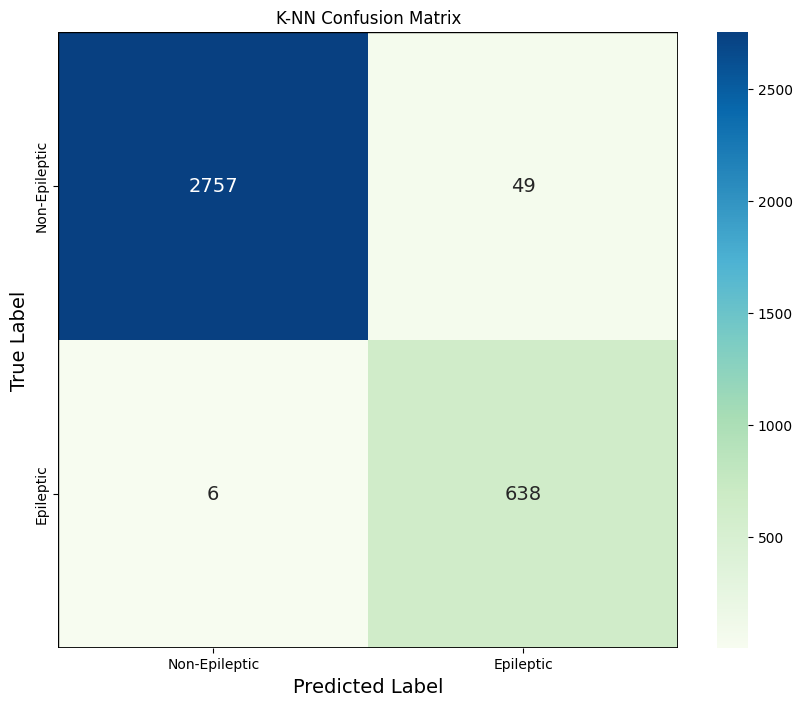

In [146]:
# plotting a confusion matrix

fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(confusion_5, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
             cmap ="GnBu", linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('K-NN Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = confusion_5.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = confusion_5.shape[0], 
            color = 'k', linewidth = 2)
ax.xaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']); ax.yaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']);
plt.show()

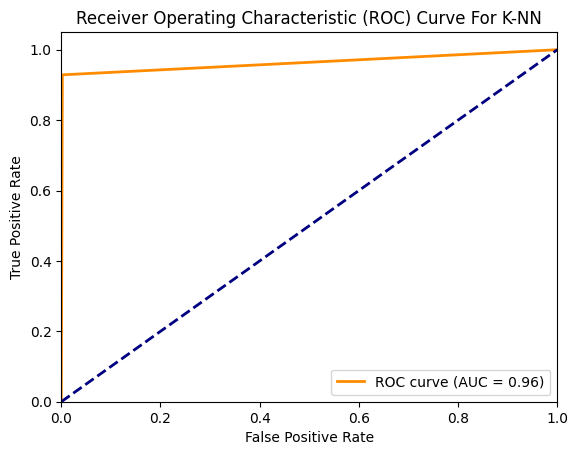

In [147]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_5)
roc_auc_5 = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For K-NN')
plt.legend(loc="lower right")
plt.show()

## Gaussian Naive Bayes + SS + PCA

In [148]:
pipe6 = Pipeline([
                ('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('bayes', GaussianNB())])

In [149]:
pipe6.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('bayes', GaussianNB())])

In [150]:
print("train score is", pipe6.score(X_train,y_train))
print("test score is", pipe6.score(X_test,y_test))

train score is 0.9191304347826087
test score is 0.9234782608695652


In [151]:
scores_6 = cross_val_score(pipe6, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores_6.mean())

<IPython.core.display.Javascript object>

Cross-Validation Accuracy Scores 0.9191304347826087


In [152]:
y_predicted_6 = pipe6.predict(X_test)

In [155]:
print(classification_report(y_test, y_predicted_6))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2763
           1       0.87      0.73      0.79       687

    accuracy                           0.92      3450
   macro avg       0.90      0.85      0.87      3450
weighted avg       0.92      0.92      0.92      3450



In [153]:
confusion_6 = confusion_matrix(y_predicted_6, y_test)


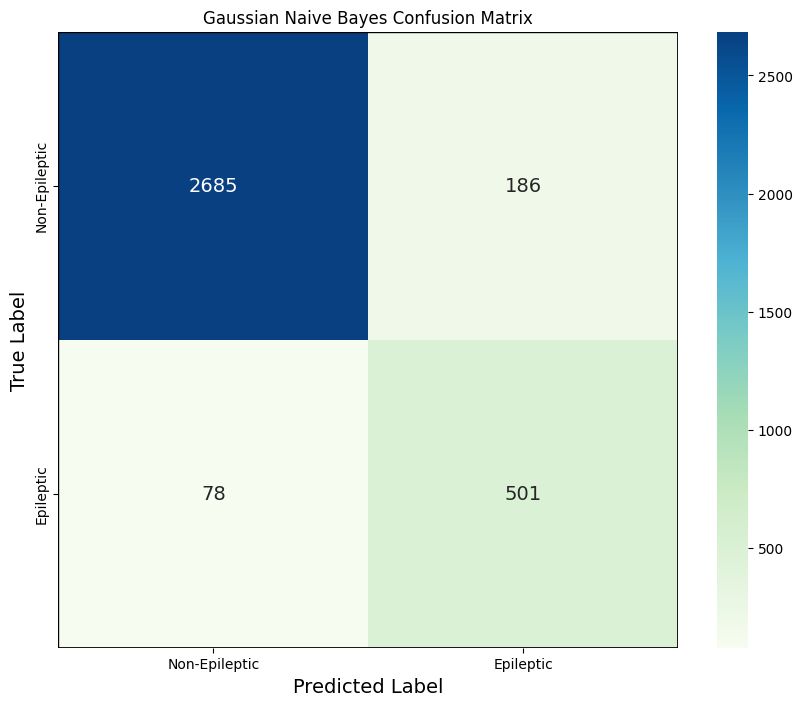

In [154]:
# plotting a confusion matrix

fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(confusion_6, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
             cmap ="GnBu", linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Gaussian Naive Bayes Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = confusion_6.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = confusion_6.shape[0], 
            color = 'k', linewidth = 2)
ax.xaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']); ax.yaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']);
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_6)
roc_auc_6 = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

## Random Forest + SS +PCA

In [159]:
pipe10 = Pipeline([
                 ('scale', StandardScaler()),
                 ('reduce_dims', PCA(n_components=0.95)),
                 ('Rando', RandomForestClassifier())
])
pipe10.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('Rando', RandomForestClassifier())])

In [160]:
print("train score is", pipe10.score(X_train,y_train))
print("test score is", pipe10.score(X_test,y_test))

train score is 1.0
test score is 0.9768115942028985


In [164]:
y_predicted_10 = pipe10.predict(X_test)
print(classification_report(y_test, y_predicted_10))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2763
           1       0.96      0.93      0.94       687

    accuracy                           0.98      3450
   macro avg       0.97      0.96      0.96      3450
weighted avg       0.98      0.98      0.98      3450



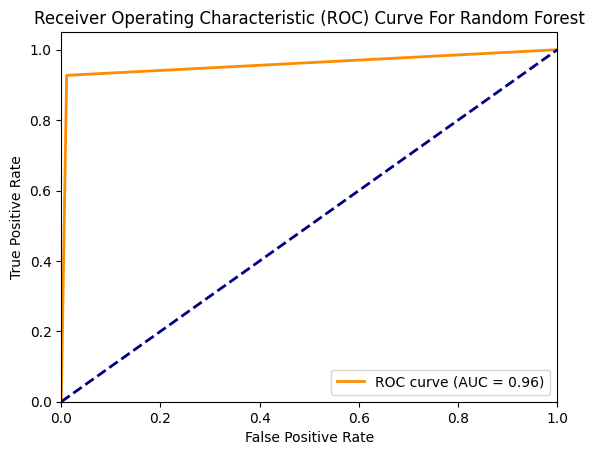

In [162]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_10)
roc_auc_10 = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_10)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For Random Forest')
plt.legend(loc="lower right")
plt.show()

IndexError: list index out of range

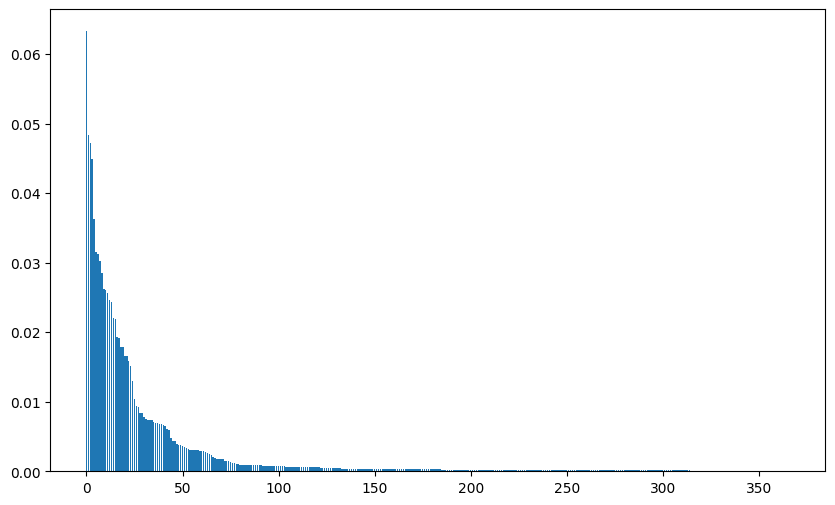

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already defined X_train and y_train
# ...

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Sort features based on importance in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Get the names of the features in the original order
# Replace 'X_train' with your actual DataFrame containing the feature data
feature_names = list((df_melt.columns))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_feature_importances)
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()



## XGBoost Model + SS + PCA

In [165]:
pipe11 = Pipeline([
                 ('scaler', StandardScaler()), 
                 ('reduce_dims', PCA(n_components=0.95)),
                 ('classifier', XGBClassifier())])

In [166]:
pipe11.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [167]:
print("train score is", pipe11.score(X_train,y_train))
print("test score is", pipe11.score(X_test,y_test))

train score is 1.0
test score is 0.9855072463768116


In [168]:
scores_11 = cross_val_score(pipe11, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores_11.mean())

<IPython.core.display.Javascript object>

Cross-Validation Accuracy Scores 0.9870807453416148


In [175]:
y_predicted_11 = pipe11.predict(X_test)

print(classification_report(y_test, y_predicted_11))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2763
           1       0.97      0.95      0.96       687

    accuracy                           0.99      3450
   macro avg       0.98      0.97      0.98      3450
weighted avg       0.99      0.99      0.99      3450



In [170]:
confusion_11 = confusion_matrix(y_predicted_11, y_test)


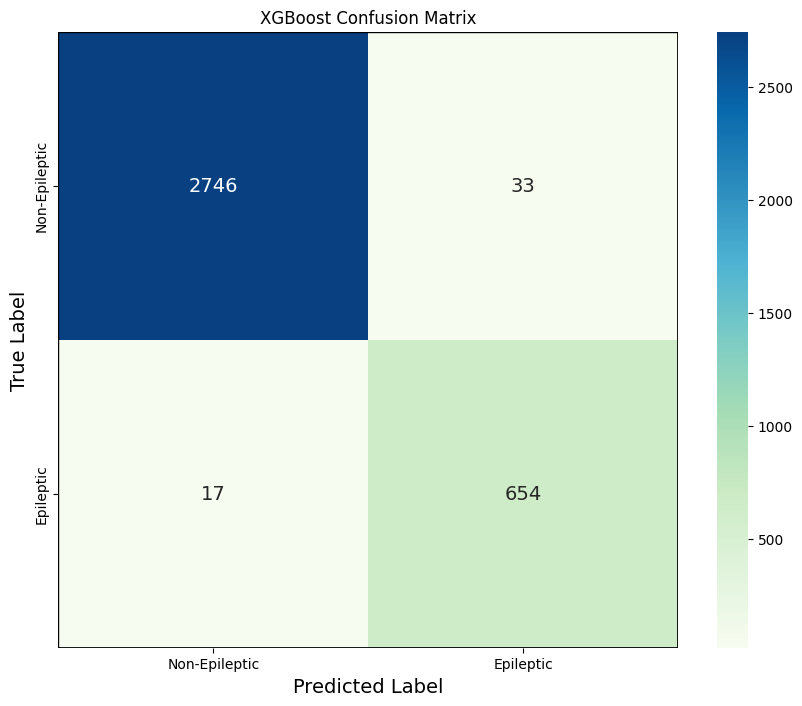

In [171]:
# plotting a confusion matrix

fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(confusion_11, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
             cmap ="GnBu", linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('XGBoost Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = confusion_11.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = confusion_11.shape[0], 
            color = 'k', linewidth = 2)
ax.xaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']); ax.yaxis.set_ticklabels(['Non-Epileptic', 'Epileptic']);
plt.show()

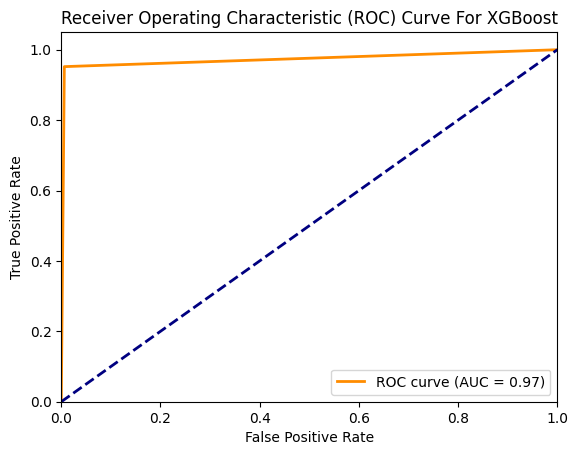

In [172]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_11)
roc_auc_11 = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_11)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For XGBoost')
plt.legend(loc="lower right")
plt.show()

In [173]:
df5 = df2.drop(columns = ['Unnamed: 0'])

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the classifier on the data
xgb_classifier.fit(X_train, y_train)

# Get feature importances from the trained classifier
feature_importances = xgb_classifier.feature_importances_

# Sort features based on importance in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Get the names of the features in the original order
# Replace 'X_train' with your actual DataFrame containing the feature data
feature_names = list(df5.columns)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_feature_importances)
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.show()
plt.save('feature importance - xgb')

KeyError: "['Unnamed: 0'] not found in axis"

## Artificial Neural Network Model w/ 1 hidden layer + relu

In [176]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [177]:
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Input layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification

In [178]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [179]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
202/202 [==============================] - 0s 1ms/step - loss: 14144.2568 - accuracy: 0.7194 - val_loss: 1391.7117 - val_accuracy: 0.9137
Epoch 2/10
202/202 [==============================] - 0s 648us/step - loss: 15242.3271 - accuracy: 0.8118 - val_loss: 2804.5537 - val_accuracy: 0.9317
Epoch 3/10
202/202 [==============================] - 0s 631us/step - loss: 16023.3691 - accuracy: 0.8685 - val_loss: 2114.8411 - val_accuracy: 0.9242
Epoch 4/10
202/202 [==============================] - 0s 653us/step - loss: 7164.6592 - accuracy: 0.9298 - val_loss: 1725.4354 - val_accuracy: 0.9410
Epoch 5/10
202/202 [==============================] - 0s 714us/step - loss: 6233.1479 - accuracy: 0.9398 - val_loss: 1313.9429 - val_accuracy: 0.9509
Epoch 6/10
202/202 [==============================] - 0s 638us/step - loss: 5120.5220 - accuracy: 0.9238 - val_loss: 13448.7266 - val_accuracy: 0.9466
Epoch 7/10
202/202 [==============================] - 0s 601us/step - loss: 16766.4141 - accuracy:

In [180]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

108/108 [==============================] - 0s 344us/step - loss: 19163.2422 - accuracy: 0.9371
Test loss: 19163.2422, Test accuracy: 0.9371


In [181]:
y_predicted_12 = model.predict(X_test)

108/108 [==============================] - 0s 378us/step


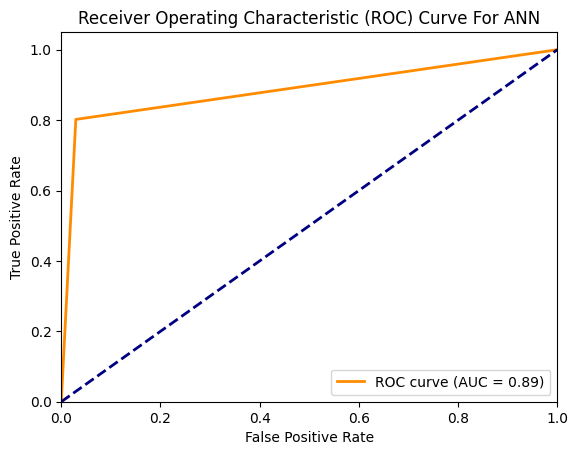

In [182]:

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_12)
roc_auc_12 = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_12)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For ANN')
plt.legend(loc="lower right")
plt.show()

## ANN model 2 w/ 4 hidden layers + relu

In [183]:
model2 = Sequential()

# Add layers to the model
model2.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))  # Input layer with 64 neurons and ReLU activation
model2.add(Dense(64, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification

In [184]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [185]:
history_2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
202/202 [==============================] - 0s 1ms/step - loss: 4611.7441 - accuracy: 0.5725 - val_loss: 858.5799 - val_accuracy: 0.7224
Epoch 2/50
202/202 [==============================] - 0s 918us/step - loss: 1122.4587 - accuracy: 0.7343 - val_loss: 464.3635 - val_accuracy: 0.7112
Epoch 3/50
202/202 [==============================] - 0s 852us/step - loss: 1204.9056 - accuracy: 0.7862 - val_loss: 2226.6267 - val_accuracy: 0.9248
Epoch 4/50
202/202 [==============================] - 0s 957us/step - loss: 3030.8945 - accuracy: 0.8135 - val_loss: 260.0880 - val_accuracy: 0.8783
Epoch 5/50
202/202 [==============================] - 0s 1ms/step - loss: 849.0894 - accuracy: 0.8522 - val_loss: 128.7108 - val_accuracy: 0.9422
Epoch 6/50
202/202 [==============================] - 0s 833us/step - loss: 939.6830 - accuracy: 0.8629 - val_loss: 229.5860 - val_accuracy: 0.9112
Epoch 7/50
202/202 [==============================] - 0s 856us/step - loss: 330.8142 - accuracy: 0.9033 - val_l

In [186]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

108/108 [==============================] - 0s 434us/step - loss: 0.4532 - accuracy: 0.9597
Test loss: 0.4532, Test accuracy: 0.9597


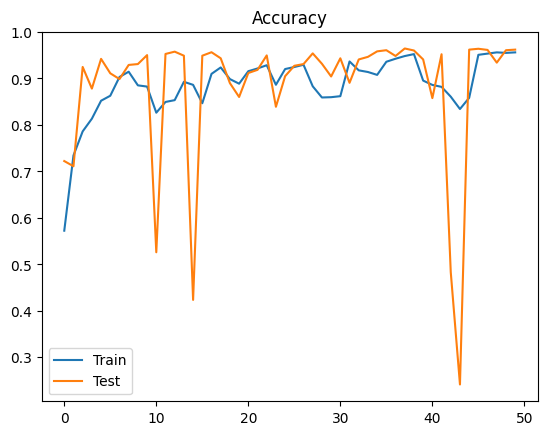

In [187]:
plt.title('Accuracy')
plt.plot(history_2.history['accuracy'], label = 'Train')
plt.plot(history_2.history['val_accuracy'], label = "Test")
plt.legend()
plt.show()

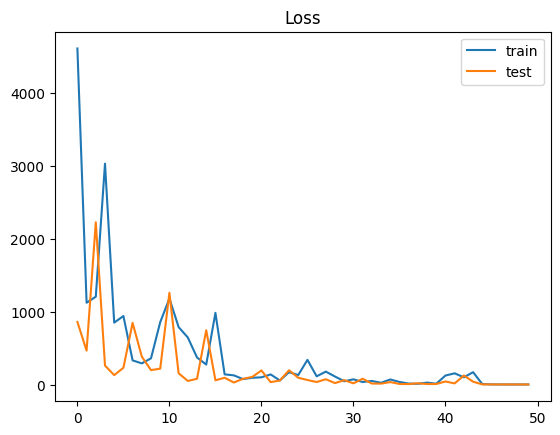

In [188]:
plt.title('Loss')
plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='test')
plt.legend()
plt.show();

In [189]:
y_predicted_13 = model2.predict(X_test)

108/108 [==============================] - 0s 473us/step


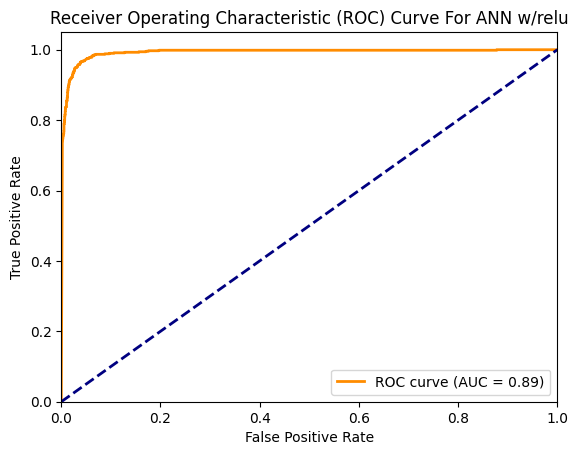

In [190]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_13)
roc_auc_13 = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_12)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For ANN w/relu')
plt.legend(loc="lower right")
plt.show()

## ANN model 3 w/ 4 hidden layers + selu

In [191]:
model3 = Sequential()

# Add layers to the model
model3.add(Dense(128, activation='selu', input_dim=X_train.shape[1]))  # Input layer with 64 neurons and ReLU activation
model3.add(Dense(64, activation='selu'))  # Hidden layer with 32 neurons and ReLU activation
model3.add(Dense(32, activation = 'selu'))
model3.add(Dense(32, activation = 'selu'))
model3.add(Dense(16, activation = 'selu'))
model3.add(Dense(1, activation = 'sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification

In [192]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [193]:
history_3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
202/202 [==============================] - 0s 1ms/step - loss: 7484.4946 - accuracy: 0.5548 - val_loss: 2600.9631 - val_accuracy: 0.5124
Epoch 2/50
202/202 [==============================] - 0s 937us/step - loss: 3458.0740 - accuracy: 0.6845 - val_loss: 518.6470 - val_accuracy: 0.8242
Epoch 3/50
202/202 [==============================] - 0s 902us/step - loss: 1509.4476 - accuracy: 0.8023 - val_loss: 430.8362 - val_accuracy: 0.7944
Epoch 4/50
202/202 [==============================] - 0s 976us/step - loss: 720.2086 - accuracy: 0.7339 - val_loss: 137.7043 - val_accuracy: 0.6025
Epoch 5/50
202/202 [==============================] - 0s 916us/step - loss: 373.9248 - accuracy: 0.5658 - val_loss: 602.2031 - val_accuracy: 0.2087
Epoch 6/50
202/202 [==============================] - 0s 880us/step - loss: 31.1412 - accuracy: 0.2039 - val_loss: 1.6192 - val_accuracy: 0.1963
Epoch 7/50
202/202 [==============================] - 0s 867us/step - loss: 1.0939 - accuracy: 0.2011 - val_loss:

In [194]:
loss, accuracy = model3.evaluate(X_test, y_test)
print(loss)
print(accuracy)

108/108 [==============================] - 0s 441us/step - loss: 0.4445 - accuracy: 0.8333
0.4445350468158722
0.8333333134651184


In [195]:
y_predicted_14= model3.predict(X_test)

108/108 [==============================] - 0s 417us/step


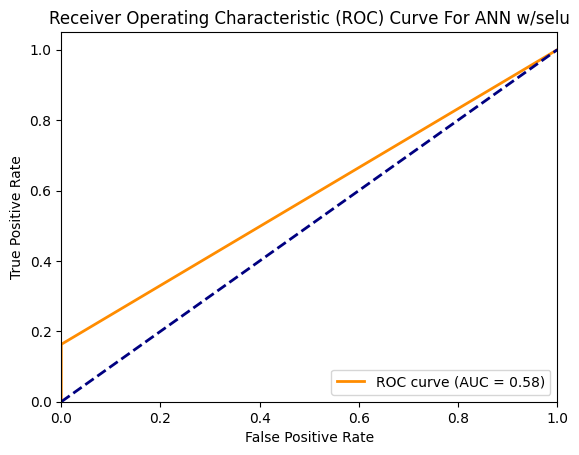

In [196]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_14)
roc_auc_14 = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_14)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For ANN w/selu')
plt.legend(loc="lower right")
plt.show()

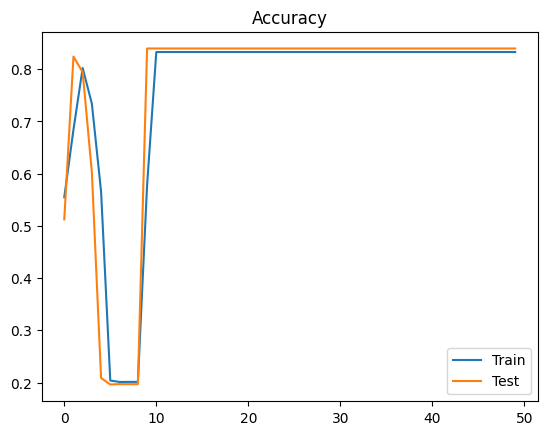

In [197]:
plt.title('Accuracy')
plt.plot(history_3.history['accuracy'], label = 'Train')
plt.plot(history_3.history['val_accuracy'], label = "Test")
plt.legend()
plt.show()

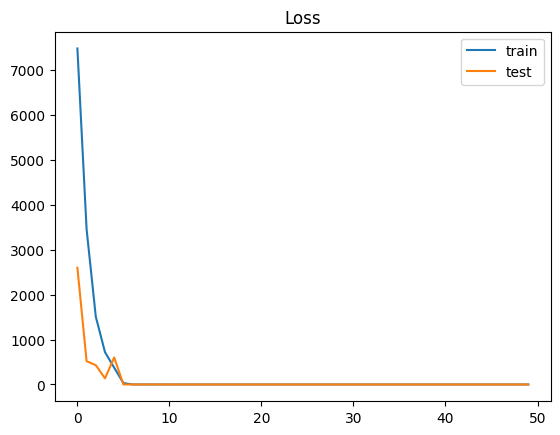

In [198]:
plt.title('Loss')
plt.plot(history_3.history['loss'], label='train')
plt.plot(history_3.history['val_loss'], label='test')
plt.legend()
plt.show();

In [199]:
from tensorflow.keras.layers import Dense, Dropout
model4 = Sequential()

# Add layers to the model
model4.add(Dense(128, activation='selu', input_dim=X_train.shape[1]))  # Input layer with 64 neurons and ReLU activation
model4.add(Dense(64, activation='selu'))
model4.add(Dropout(0.2))# Hidden layer with 32 neurons and ReLU activation

model4.add(Dense(32, activation = 'selu'))
model4.add(Dropout(0.2))

model4.add(Dense(32, activation = 'selu'))
model4.add(Dropout(0.2))

model4.add(Dense(16, activation = 'selu'))
model4.add(Dropout(0.2))

model4.add(Dense(1, activation = 'sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification

In [200]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [201]:
history_4 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
227/227 [==============================] - 1s 1ms/step - loss: 21554.4492 - accuracy: 0.4192 - val_loss: 2705.0935 - val_accuracy: 0.4584
Epoch 2/50
227/227 [==============================] - 0s 907us/step - loss: 7722.0933 - accuracy: 0.4253 - val_loss: 678.5173 - val_accuracy: 0.2932
Epoch 3/50
227/227 [==============================] - 0s 934us/step - loss: 4144.2612 - accuracy: 0.4465 - val_loss: 163.4240 - val_accuracy: 0.2671
Epoch 4/50
227/227 [==============================] - 0s 1ms/step - loss: 2251.8892 - accuracy: 0.5046 - val_loss: 161.6256 - val_accuracy: 0.7068
Epoch 5/50
227/227 [==============================] - 0s 903us/step - loss: 1650.8651 - accuracy: 0.6199 - val_loss: 8.2897 - val_accuracy: 0.8696
Epoch 6/50
227/227 [==============================] - 0s 894us/step - loss: 560.0353 - accuracy: 0.7135 - val_loss: 1.6942 - val_accuracy: 0.8484
Epoch 7/50
227/227 [==============================] - 0s 892us/step - loss: 432.2323 - accuracy: 0.7314 - val_los

In [202]:
loss, accuracy = model4.evaluate(X_test, y_test)
print(loss)
print(accuracy)

108/108 [==============================] - 0s 440us/step - loss: 0.4599 - accuracy: 0.8296
0.45992839336395264
0.8295652270317078


108/108 [==============================] - 0s 431us/step


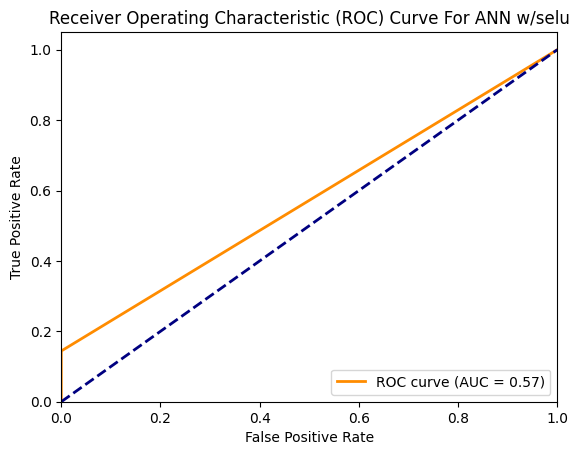

In [203]:
y_predicted_15= model4.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_15)
roc_auc_15 = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_15)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For ANN w/selu')
plt.legend(loc="lower right")
plt.show()